# Dinâmica e evolução de sistemas fechados

Em sistemas isolados descritos pelo operador densidade $\hat{\rho}$, puro os misto, a evolução temporal é governada pela equação de von Neumann:

$$
\begin{align*}\frac{d}{dt}\hat{\rho}(t) 
&= -i[\hat{H}(t),\hat{\rho}(t)].
\end{align*}
$$

Assim como na equação de Schrodinger para a evolução do estado puro em termos de um operador linear $\hat{U}(t,t_0)$, explicitamente
$$
|\psi(t)\rangle = \hat{U}(t,t_0) |\psi(t_0)\rangle,
$$

temos para o operador densidade
$$
\hat{\rho}(t) = \hat{U}(t,t_0) \hat{\rho}(t=0) \hat{U}^\dagger(t,t_0),
$$
com
$$
\begin{align*}
 \frac{d}{dt}\hat{U}(t,t_0) =-i \hat{H}(t) \hat{U}(t,t_0),
 \end{align*}
$$
com $\hat{U}(t_0,t_0) = \mathbb{I}$.

O operador evolução $\hat{U}(t_0,t)$ é unitário.


Isso facilita a nossa vida porque dado o Hamiltoniano $\hat{H}(t)$, encontrando o operador evolução, podemos facilmente calcular a matriz de densidade em qualquer instante de tempo através de uma simples rotação. Vimos que a unitariedade de $\hat{U}(t,t_0)$ preserva a pureza .

Vamos aqui ver ilustrações de como calcular numericamente a evolução de $\hat{\rho}$ considerando o bff: sistema de dois níveis, aka, qubit.

Um pacote sensacional do python que oferece diversos recursos prontos para brincar com a dinâmica de sistemas abertos e fechados é o QuTip.



In [1]:
import qutip

## Hamiltoniano independente do tempo

Se o Hamiltoniano é independente do tempo, a solução para $\hat{U}(t,t_0)$ é simplificada

$$
\hat{U}(t,t_0) = e^{-i \hat{H}(t-t_0)}.$$

Na base de autoestados $|\psi_n\rangle$ de $\hat{H}$, escrevemos 
$$
\hat{U}(t,t_0) = \sum_n e^{-i E_n (t-t_0)}|\psi_n\rangle \langle \psi_n|
.$$


Vamos considerar o exemplo visto na aula onde 
$$
\hat{H} = J \hat{\sigma}_x.
$$

Vimos que o operador evolução nada mais é do que 
$$
\hat{U}(t,t_0)  = e^{-iJ \hat{\sigma}_x(t-t_0)} 
$$

$$
\hat{U}(t,t_0)  = 
\cos{J(t-t_0)} \mathbb{I} - i \sin {J(t-t_0)} \sigma_x
$$

ou 
$$
\hat{U}(t,t_0)  = e^{-iJ(t-t_0)} |+\rangle\langle +| + e^{iJ(t-t_0)} |-\rangle\langle -| .
$$


Matricialmente, 
$$
\hat{U}(t,t_0) = 
\begin{pmatrix} \cos{[J(t-t_0)]} & i\sin{[J(t-t_0)]} \\ 
i\sin{[J(t-t_0)]} & \cos{[J(t-t_0)]}  \end{pmatrix}
$$


Usando esse operador, solução analítica de $\hat{\rho}(t)$ é

$$
\hat{\rho}(t) = \begin{pmatrix} (1 -\epsilon) \cos^2{[J(t-t_0)]}+ \epsilon \sin^2{[J(t-t_0)]}& -i  \sin{[J(t-t_0)]} \cos{[J(t-t_0)]}(1-2\epsilon)\\ i  \sin{[J(t-t_0)]} \cos{[J(t-t_0)]}(1-2\epsilon) &  \epsilon \cos^2{[J(t-t_0)]}+ (1-\epsilon) \sin^2{[J(t-t_0)]}\end{pmatrix}
$$


Como todos esses objetos dependem dos parâmetros do Hamiltoniano e do tempo $t$ vale a pena criar funções para trabalhar com eles.

In [2]:
def U_Op_expm(HOp: qutip.Qobj, t: float, t0: float = 0): 
    """
    computes the evolution operator of a time-independent 
    Hamiltonian by exponentiation using QuTip
    
    inputs: 
        - HOp: operator associated with Hamiltonian (qutip.Qobj)
        - t: time (float)
        - t0: initial time (float)
        
    outpus:
        - U(t,t0): numerical evolution operator (qutip.Qobj)    
    """
    return (-1j * HOp * (t-t0)).expm()

In [3]:
import numpy as np
def U_Op_fromHeigenstates(HOp: qutip.Qobj, t: float, t0: float = 0): 
    """
    computes the evolution operator of a time-independent 
    Hamiltonian from its spectram decomposition using QuTip
    
    inputs: 
        - HOp: operator associated with Hamiltonian (qutip.Qobj)
        - t: time (float)
        - t0: initial time (float)
        
    outpus:
        - U(t,t0): numerical evolution operator (qutip.Qobj)    
    """
    En, Psin = HOp.eigenstates()
    UOp = 0 * HOp
    for n in range(En.shape[0]):
        UOp += np.exp(-1J* En[n] * (t-t0)) * qutip.ket2dm(Psin[n])
        
    return UOp

In [4]:
J = 1.0
sx = qutip.sigmax()
H = J * sx

# um tempo teste
t = 1.5

Testando se as funções produzem objetos iguais para $t=0.1$

In [5]:
# exponencial
U_Op_expm(H, t, 0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.0707372+0.j         0.       -0.99749499j]
 [0.       -0.99749499j 0.0707372+0.j        ]]

In [6]:
# dos auto-estados de H
U_Op_fromHeigenstates(H, t,0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.0707372+0.j         0.       -0.99749499j]
 [0.       -0.99749499j 0.0707372+0.j        ]]

O QuTip tem ainda a função propagator que permite obter o operador $\hat{U}(t,t_0)$ diretamente a partir do Hamiltoniano e de uma lista de tempos. Comparemos com os objetos acima.

In [7]:
qutip.propagator(H, [0,t], [])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.07073663+0.j         0.        -0.99749503j]
 [0.        -0.99749503j 0.07073663+0.j        ]]

Fantástico, né? É possível ainda trabalhar com Hamiltonianos dependentes do tempo. Vamos ver já já.
Mostremos, primeiro, que esses operadores são a mesma coisa que encontramos analiticamente. 


In [8]:
def U_Op_example_analytical(J: float = 1.0, t: float = 0.1, t0: float = 0): 
    """
    computes the evolution operator of a time-independent 
    Hamiltonian from its spectram decomposition using QuTip
    
    inputs: 
        - J: Hamiltonian parameter (float)
        - t: time (float)
        - t0: initial time (float)
        
    outpus:
        - U(t,t0): analytical evolution operator (qutip.Qobj)    
    """
    a = np.cos(J*(t-t0))
    b = np.sin(J*(t-t0))
    return qutip.Qobj(np.array([[a, -1J*b],[-1J*b, a]]))

In [9]:
U_Op_example_analytical(J, t, 0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.0707372+0.j         0.       -0.99749499j]
 [0.       -0.99749499j 0.0707372+0.j        ]]

A seguir, vamos ver que $\hat{U}(t,t_0)$ é, de fato, unitária!

No QuTip, a multiplicação de operadores é feita com o operador tradicional da multiplicação em python " * ". O ${}^\dagger$ de um qutip.Qobj, por sua vez, pode ser calculado simplesmente usando "O.dag()".
Note que, se estivéssemos lidando com matrizes do numpy, precisaríamos usar o " @ " e ainda "O.T.conjugate()" 

In [10]:
U = U_Op_expm(H, t, 0)

In [11]:
U * U.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [12]:
U.dag() * U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

Agora que temos o nosso operador evolução, podemos evoluir o estado inicial do exemplo
$$
\hat{\rho}(t=0) = \begin{pmatrix} 1 -\epsilon & 0 \\ 0 & \epsilon\end{pmatrix}
$$
para uma lista de tempos e calcular como a pureza é modificada durante a dinâmica. 


O QuTip tem uma função que nos permite simplesmente calcular $\hat{\rho}(t)$ sem, necessariamente calcular o operador $\hat{U}(t,t_0)$ e fazer a rotação. É o mesolve. Vamos ilustrar as duas formas e mostrar que são equivalentes.

Ah, os objetos qutip.Qobj também têm uma função para calcular a pureza: "O.purity()" does the job!



In [13]:
# Função para o estado inicial
def initial_state_twolevel(epsilon: float = 0.1):
    """
    creates an initial state for a two-level system with populations
    1- epsilon and epsilon.
    
    inputs:
        - epsilon: level of purity (epsilon=0, pure state in the ground-state)
        
    outputs:
        - density matrix of the two-level system (qutip.Qobj)
    """
    return qutip.Qobj(np.array([[1-epsilon,0],[0, epsilon]]))

In [14]:
# lista de tempos
tmax = 10.0
nts = 1001
ts = np.linspace(0,tmax,nts)


In [15]:
# estado inicial
epsilon = 0.1
rho_0 = initial_state_twolevel(epsilon)

In [16]:
# definindo uma função para calcular a evolução através de rho_0 e U
def evolve_rho0_from_propagator(HOp: qutip.Qobj, rho_0: qutip.Qobj, ts: np.array):
    nts = ts.shape[0]
    rho_ts = []
    for i in range(nts):
        t = ts[i]
        U = U_Op_expm(HOp, t, 0.0)
        rho_t = U * rho_0 * U.dag()
        rho_ts.append(rho_t)
        
    return rho_ts
    

A função pronta do QuTip retorna uma variável "result". Para acessar os $\hat{\rho}(t)$ em cada instante de tempo, basta usar "result.states". Isso é uma lista de matrizes de densidade. 

In [17]:
# usando a função pronta do QuTip para calcular rho em vários instantes de tempo
rho_ts_qutip = qutip.mesolve(H, rho_0, ts, [], []).states


In [18]:
# usando a função que escrevemos
rho_ts_ehnois = evolve_rho0_from_propagator(H, rho_0, ts)


In [19]:
# um índice de tempo aleatório, pode mudar a vontade
it = 666
print('funcao mesolve')
rho_ts_qutip[it]

funcao mesolve


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.79168305+0.j         0.        +0.27371388j]
 [0.        -0.27371388j 0.20831695+0.j        ]]

In [20]:
print('funcao com operador evolucao')
rho_ts_ehnois[it]

funcao com operador evolucao


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.79168405+0.j         0.        +0.27371594j]
 [0.        -0.27371594j 0.20831595+0.j        ]]

Pode mudar o índice a vontade. Suspeitamos que a função é bem parecida com o que o QuTip faz internamente.  Vale a pena dar uma olhada nos códigos fonte se você é curiose.

Agora, sim: pureza! Lembra que dissemos que a pureza não muda? Pois é!

In [21]:
purity_ts = np.zeros(nts)

for it in range(nts):
    purity_ts[it] = rho_ts_qutip[it].purity()

Ah, mas eu quero ver isso! Bora plotar!
Minha biblioteca favorita do python: matplotlib!

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# rendering latex because I like it
mpl.rcParams.update({'text.usetex': True,  'axes.labelsize': 'large'})

(0.0, 1.0)

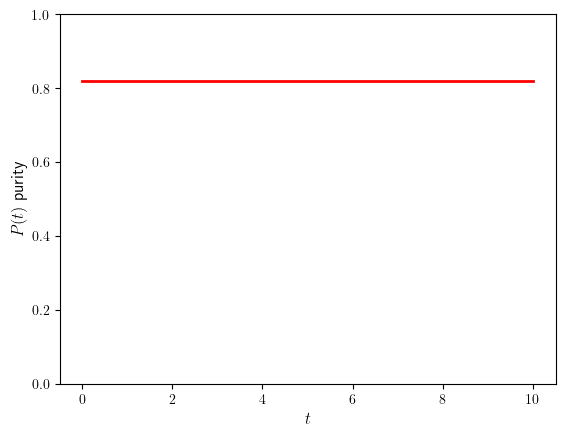

In [23]:
fig, ax = plt.subplots()
ax.plot(ts, purity_ts, 'r-', lw=2)
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$P(t)$ purity")
ax.set_ylim(0,1)

## Hamiltoniano dependente do tempo

Ok, neste caso, a gente viu duas possibilidades

(ii) $[\hat{H}(t), \hat{H}(t')] = 0$, que dá como solução

$$
\hat{U}(t,t_0) = \exp{\left(-i \int_{t_0}^t dt' \hat{H(t')}\right)}
$$

e (iii) $[\hat{H}(t), \hat{H}(t')] \neq 0$, que dá como solução

$$
\hat{U}(t, t_0) = 1 + \sum_{n=0}^\infty ( -i)^n
		\int_{t_0}^t dt_1 \int_{t_0}^{t_1} dt_2 ... \int_{t_0}^{t_{n-1}} dt_{n} \hat{H}(t_1) \hat{H}(t_2) ... \hat{H}(t_n)
$$

Confesso que, a primeira vez que eu tentei resolver esse conjunto de integrais aninhadas em um sistema que apareceu na minha pesquisa eu pensei 'eu vou fazer isso é no QuTip que é mais rápido'. Pois é, minha alma foi corrompida pelo QuTip.

A documentação deles para sistemas dependentes do tempo é bem completa.  Veja: [Solving Problems with Time-dependent Hamiltonians](https://qutip.org/docs/latest/guide/dynamics/dynamics-time.html).

Eu, particularmente gosto do método de usar funções com dicionários. Vou mostrar no exemplo. 

### Landau-Zener
Aqui, eu vou adaptar nosso exemplo para um modelinho que aparece recorrentemente em teoria de controle quântico e é quase um lego básico que permite resolver muitos problemas que conseguem se quebrar em peças de lego: o modelo Landau-Zener. 

Ele descreve um spin (ou sistema de dois níveis ou qubit) com um termo de spin-flip $\uparrow \leftrightarrow \downarrow $ e um campo na direção longitudinal $\hat{z}$. O Hamiltoniano é:

$$
\hat{H}_{LZ}(t) = J \hat{\sigma}_x + \omega(t) \hat{\sigma}_z
$$

Esse modelo simples não é tão fácil de resolver na mão para qualquer $\omega(t)$.

Quem tiver curiosidade e quiser brincar mais, eu recomendo fortemente o artigo [Exact solutions to Landau–Zener problems by evolution operator method](https://www.sciencedirect.com/science/article/pii/S0375960110003312) que mostra uma forma alternativa de quebrar o operador evolução como $\hat{U}(t) = e^{i\alpha(t) \hat{\sigma}_x} e^{i\beta(t) \hat{\sigma}_y} e^{i\gamma(t) \hat{\sigma}_z}$. Isso é bacana porque se você estiver simulando um circuito quântico (que vamos ver mais pra frente), fica muito fácil implementar essa unitária. Vou colocar esse link no Notion.


Vamos considerar a dependência temporal da forma linear

$$
\omega(t) = \omega_0 + \Delta \frac{t}{\tau}.
$$

Isso descreve uma rampa no tempo que leva $\omega$ de $\omega_0$ a $\Delta$ com velocidade controlada por $\tau$. Quanto menor $\tau$ mais rápida é essa velocidade.

Veja que o Hamiltoniano tem uma parte estática (termo em x) e uma dinâmica (termo em z). A estrutura que ele usa para o objeto que passamos para mesolve é uma lista com duas entradas:
- Hstatic: qutip.Qobj, incluindo o operador multiplicado pelos acoplamentos de energia. No exemplo: $J \hat{\sigma}_x$
- \[ OpHdinamic, timeDependentfunction \]: uma lista com o operador que vem acompanhado da função dependente do tempo. Os argumentos dessa função (os parâmetros) são passados através de args.


Como a pureza não muda, podemos estar interessados em calcular observáveis no tempo. Digamos, os valores esperados $\langle \sigma_x \rangle$, $\langle \sigma_y \rangle$, $\langle \sigma_z \rangle$.

O QuTip permite que a gente calcule valores esperados diretamente na chamada da função mesolve. Alternativamente, podíamos obter as matrizes de densidade instantâneas e calcular esses valores esperados na mão. Vamos ver os dois métodos. 

Segue a implementação:

In [24]:
# função para omega(t)

def omega_t(t: float, params_omega: dict):
    """
        function for omega(t) to be used with QuTip 
        using dictionary
        
        inputs:
            - t: time variable
            - params_omega: dictionary with entries 
                            omega_0
                            Delta
                            tau
    """
    return params_omega['omega_0'] + params_omega['Delta'] * t / params_omega['tau']



In [25]:
# operadores estático e dinâmico
Hstatic = J * qutip.sigmax()
Hdinamic = qutip.sigmaz()

In [26]:
# dicionário com parâmetros para a parte temporal
omega_args = {'omega_0': -2.0, 'Delta': 2.0, 'tau': 5.0}

In [27]:
# Hamiltoniano total
H_LZ = [Hstatic, [Hdinamic, omega_t]]

In [28]:
# agora, sim, o rho(t)
rho_ts_LZ = qutip.mesolve(H_LZ, rho_0, ts, [], [], args=omega_args).states



In [29]:
# observáveis, através dos rho(t)
sx_ts = np.zeros(nts)
sy_ts = np.zeros(nts)
sz_ts = np.zeros(nts)

for it in range(nts):
    sx_ts[it] = qutip.expect(qutip.sigmax(),rho_ts_LZ[it])
    sy_ts[it] = qutip.expect(qutip.sigmay(),rho_ts_LZ[it])
    sz_ts[it] = qutip.expect(qutip.sigmaz(),rho_ts_LZ[it])

In [30]:
# observáveis, através do mesolve diretamente
observables = [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()]
obs_t = qutip.mesolve(H_LZ, rho_0, ts, [], e_ops=observables, args=omega_args).expect



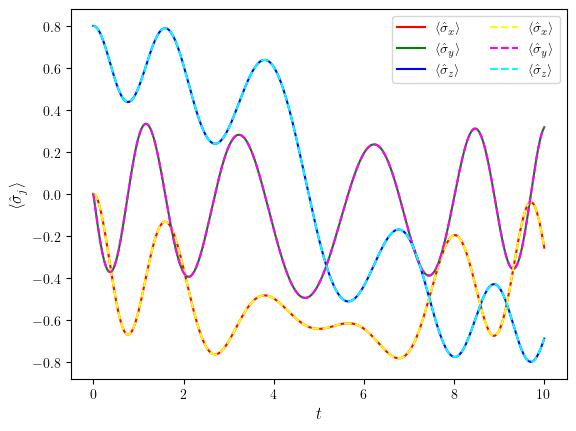

In [31]:
fig2, ax2 = plt.subplots()

ax2.plot(ts, sx_ts, 'r-', label=r"$\langle \hat{\sigma}_x \rangle $")
ax2.plot(ts, sy_ts, 'g-', label=r"$\langle \hat{\sigma}_y \rangle $")
ax2.plot(ts, sz_ts, 'b-', label=r"$\langle \hat{\sigma}_z \rangle $")


ax2.plot(ts, obs_t[0], color='yellow',linestyle='--', label=r"$\langle \hat{\sigma}_x \rangle $")
ax2.plot(ts, obs_t[1], color='magenta',linestyle='--', label=r"$\langle \hat{\sigma}_y \rangle $")
ax2.plot(ts, obs_t[2], color='cyan',linestyle='--', label=r"$\langle \hat{\sigma}_z \rangle $")


ax2.set_xlabel(r"$t$")
ax2.set_ylabel(r"$\langle \hat{\sigma}_j \rangle $")

leg2 = ax2.legend(ncol=2)